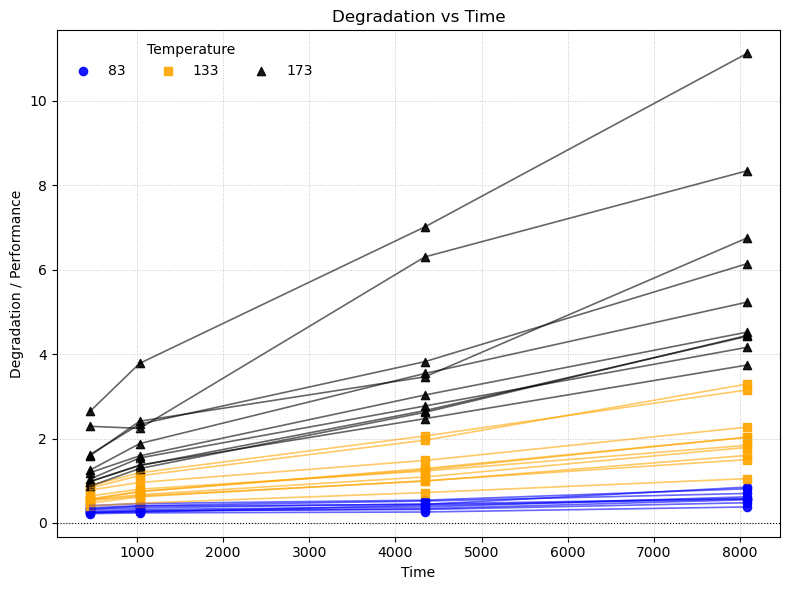

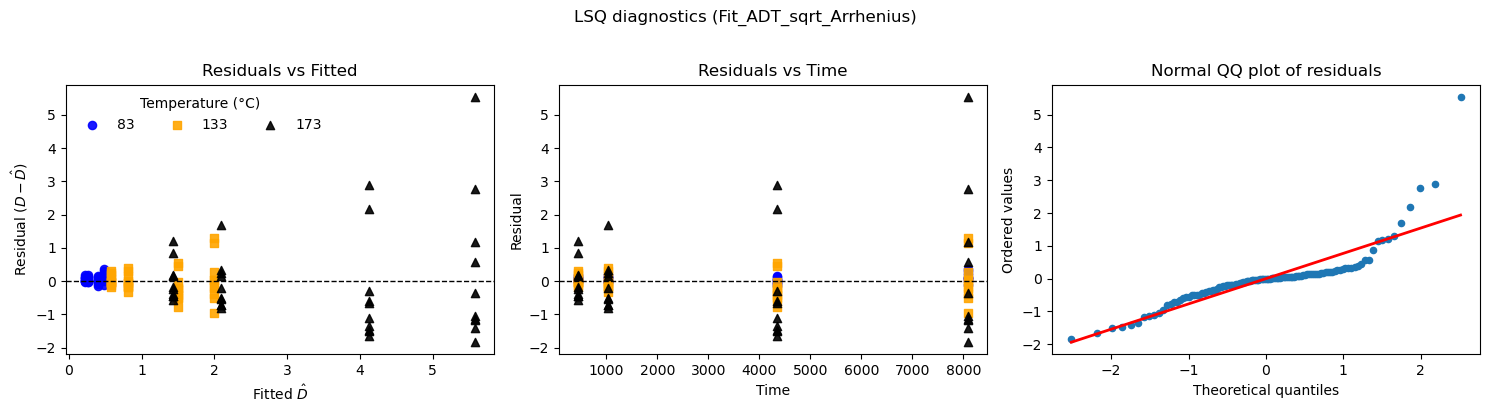

100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:21<00:00, 94.93it/s]


### Bayesian (multiplicative) Parameter Estimates (95% CrI)

| Parameter | Mean | Median | 95% CrI |
|-----------|------|--------|----------------|
| g0 | 0.269434 | 0.269076 | [0.214748, 0.327836] |
| g1 | 0.000473398 | 0.000460202 | [0.0002241, 0.000754828] |
| Ea (eV) | 0.482331 | 0.480791 | [0.423263, 0.546651] |
| $\sigma$ | 0.309668 | 0.308323 | [0.269946, 0.351518] |

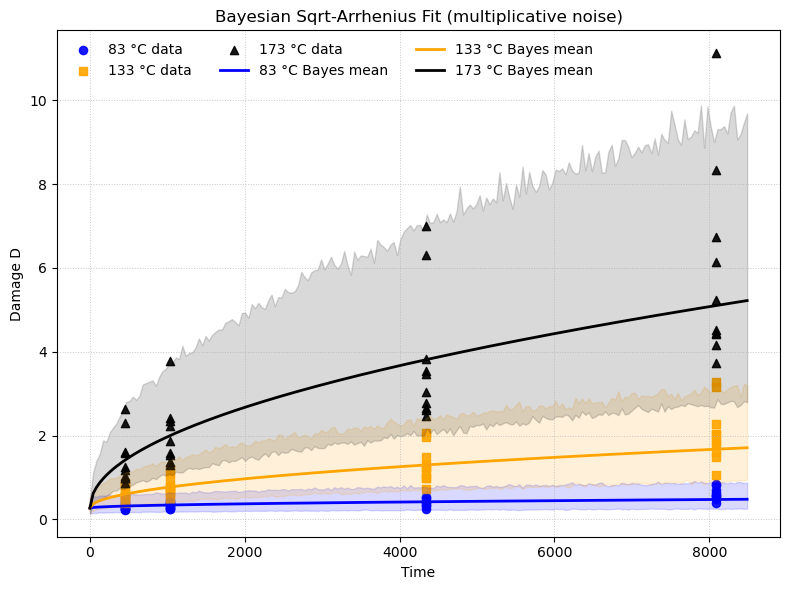

In [ ]:
import pandas as pd
from ADT_fitters import Fit_ADT_sqrt_Arrhenius

df = pd.read_csv("Example_5.2_resistor_data.csv")

# --- Tidy (long) format for plotting ---
time_cols = ['h_452', 'h_1030', 'h_4341', 'h_8084']
time_map = {'h_452': 452, 'h_1030': 1030, 'h_4341': 4341, 'h_8084': 8084}

long = df.melt(
    id_vars=['Unit', 'Temperature_C'],
    value_vars=time_cols,
    var_name='time_label',
    value_name='pct_increase'
).dropna(subset=['pct_increase'])

long['hours'] = long['time_label'].map(time_map).astype(int)
t_time = long["hours"].to_numpy(float)
T_acc_C = long["Temperature_C"].to_numpy(float)
D_obs = long["pct_increase"].to_numpy(float)
T_degC = long["Temperature_C"].to_numpy(float)
unit = long["Unit"].to_numpy()
T_use = 50   # deg C


mle_fit = Fit_ADT_sqrt_Arrhenius(
    degradation=D_obs,
    stress=T_acc_C,
    time=t_time,
    unit = unit,
    stress_use=T_use,
    Df=5,
    CI=0.95,
    method="Bayesian",
    # noise="additive",
    noise="multiplicative",
    show_data_plot=True,
    show_LSQ_diagnostics=True,
    show_noise_bounds=True,
    show_use_TTF_dist=True,
    print_results=True)

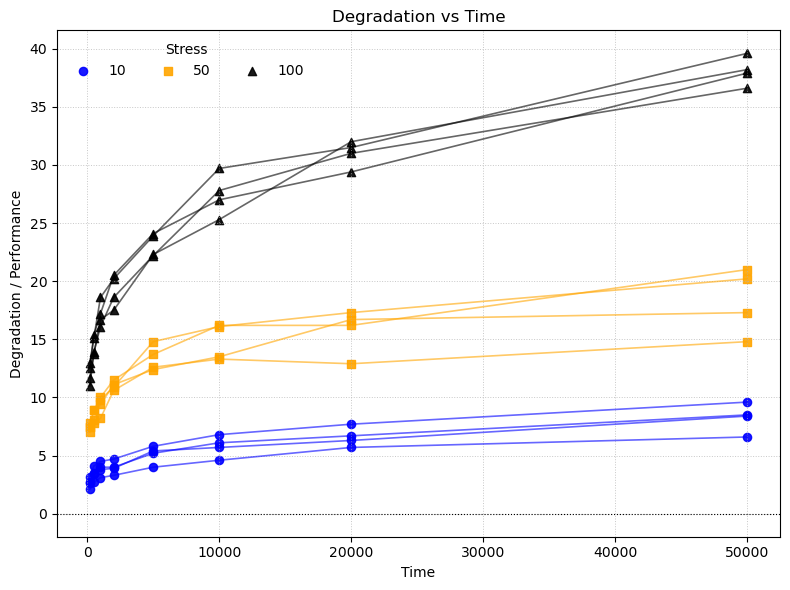

C:\Users\leaat\Dropbox\University of Maryland\ENRE648 - PPoF Chap Review - Degradation Analysis\ADT_fitters.py:281: RuntimeWarning: overflow encountered in square
  return np.sum(resid ** 2)
C:\Users\leaat\anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:596: RuntimeWarning: invalid value encountered in subtract
  df = fun(x1) - f0


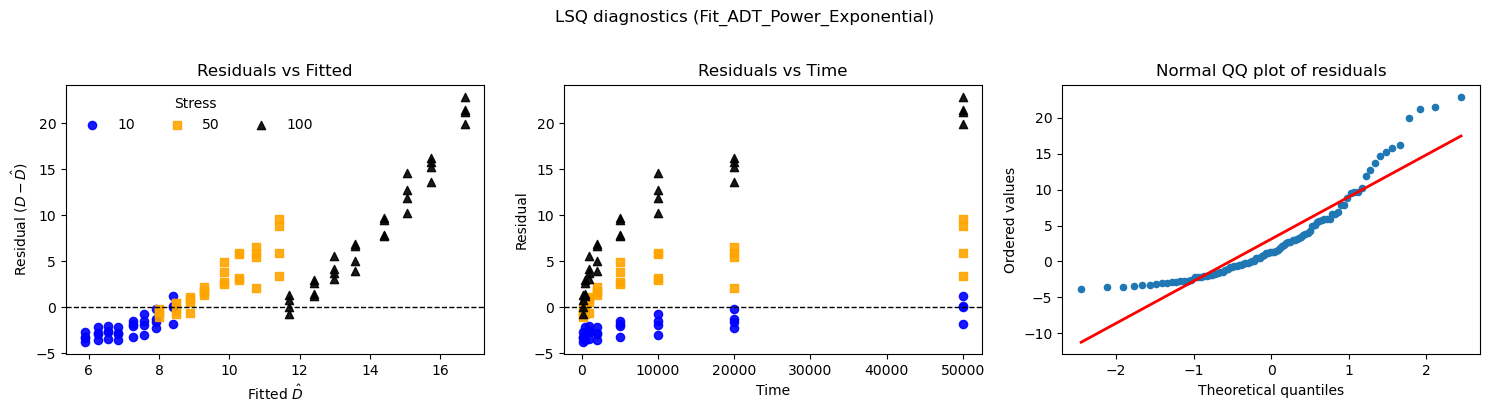

  0%|                                                                                         | 0/1000 [00:00<?, ?it/s]C:\Users\leaat\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:365: RuntimeWarning: overflow encountered in square
  return -x**2 / 2.0 - _norm_pdf_logC
  1%|▉                                                                              | 12/1000 [00:00<00:08, 114.64it/s]C:\Users\leaat\Dropbox\University of Maryland\ENRE648 - PPoF Chap Review - Degradation Analysis\ADT_fitters.py:1574: RuntimeWarning: overflow encountered in power
  mu = b * np.exp(a * S_stress) * (np.clip(t_time, 0.0, None) ** n)
100%|█████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:15<00:00, 131.53it/s]


### Bayesian (additive) Parameter Estimates (95% CrI)

| Parameter | Mean | Median | 95% CrI |
|-----------|------|--------|----------------|
| b | 1.08761 | 0.991208 | [0.449386, 1.90424] |
| a | -0.0196863 | 0.01487 | [-0.372244, 0.0212243] |
| n | 0.197447 | 0.198679 | [0.0338941, 0.215472] |
| $\sigma$ | 2.69581 | 1.54662 | [1.25805, 14.8252] |

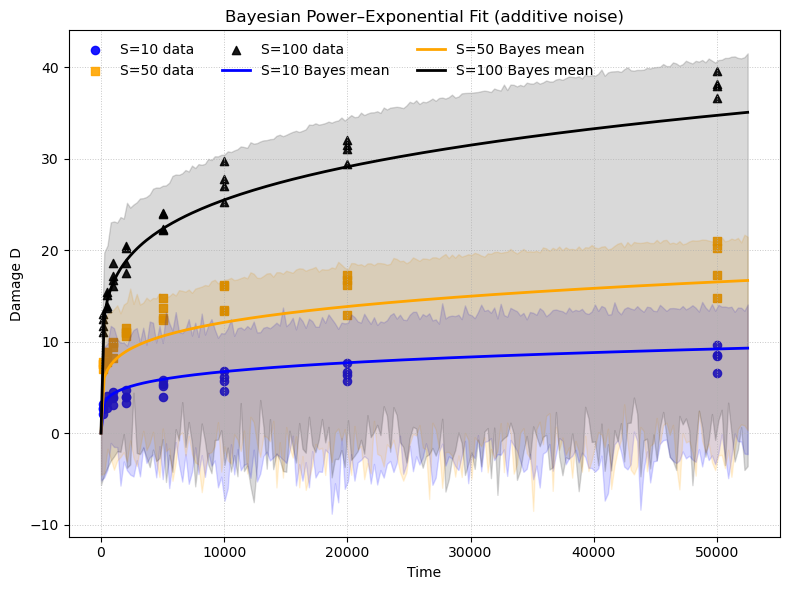

### Posterior summary for TTF at S=5 (Df=50.0)

- Mean life: 1.3779e+09 time units
- Median life: 2.4667e+08 time units
- 95% HDI: [2.8299e+04, 4.9458e+08] time units
- 95% ETI: [2.2665e+06, 6.0147e+08] time units

c:\users\leaat\reliability\reliability\Fitters.py:440: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat(


Results from Fit_Everything:
Analysis method: MLE
Failures / Right censored: 7359/0 (0% right censored) 

   Distribution       Alpha     Beta   Gamma     Alpha 1  Beta 1     Alpha 2   Beta 2 Proportion 1 DS          Mu       Sigma      Lambda  Log-likelihood   AICc    BIC      AD optimizer
Weibull_Mixture                              2.98925e+08 2.82429 3.04843e+08   0.2433     0.935767                                                -147322 294654 294688 53.0556       TNC
 Loglogistic_2P 2.46813e+08  2.64905                                                                                                              -149973 299950 299964 280.537       TNC
 Loglogistic_3P 2.46813e+08  2.64905       0                                                                                                      -149973 299952 299973 280.537       TNC
   Lognormal_2P                                                                                           19.2094     1.20563                     -153

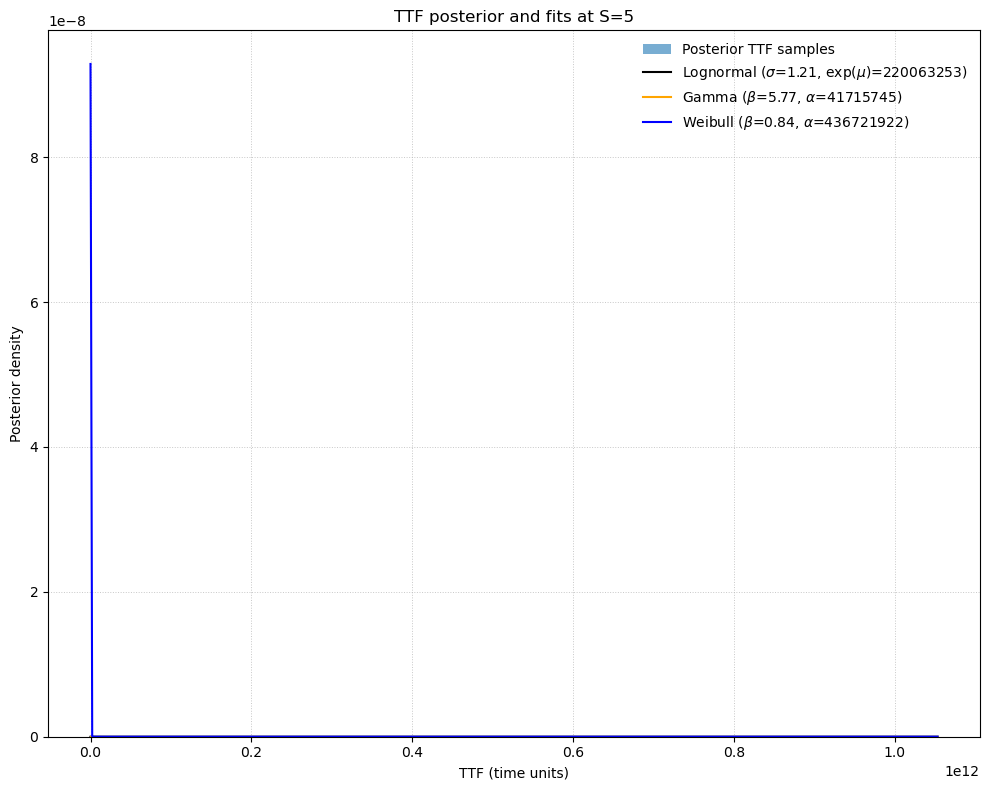

In [1]:
# EXAMPLE 5.4
import pandas as pd
from ADT_fitters import Fit_ADT_Power_Exponential

# Load wide-format data
df_wide = pd.read_csv("Example_5.4_test_weight_losses_data.csv")
#df_wide = pd.read_csv("Example_5.4_test_weight_losses_data-Modified.csv") # Modified for more consistent shape parameter fits

# --- Convert wide → long (values are in GRAMS in the CSV) ---
value_cols = [c for c in df_wide.columns if c not in ["AppliedWeight (g)", "Unit"]]
long = df_wide.melt(
    id_vars=["AppliedWeight (g)", "Unit"],
    value_vars=value_cols,
    var_name="Cycles",
    value_name="WeightLoss (µg)"
)

# Ensure numeric dtypes
long["Cycles"] = pd.to_numeric(long["Cycles"], errors="coerce").astype(int)
long["AppliedWeight (g)"] = pd.to_numeric(long["AppliedWeight (g)"], errors="coerce")
long["WeightLoss (µg)"] = pd.to_numeric(long["WeightLoss (µg)"], errors="coerce")

# Failure threshold at 50 micrograms (now in µg to match the y-axis)
Df = 50.0   # micrograms
S_use = 5   # grams

# Final arrays (keep names explicit to avoid shadowing)
t_time = long["Cycles"] .to_numpy(float)
stress = long["AppliedWeight (g)"].to_numpy(float)
D_obs = long["WeightLoss (µg)"] .to_numpy(float)
unit = long["Unit"].to_numpy()

fit = Fit_ADT_Power_Exponential(
    degradation=D_obs,
    stress=stress,
    time=t_time,
    unit = unit,
    stress_use=S_use,
    Df=Df,
    CI=0.95,
    method="Bayesian",
    noise="additive",
    # noise="multiplicative",
    show_data_plot=True,
    show_LSQ_diagnostics=True,
    show_noise_bounds=True,
    show_use_TTF_dist=True,
    print_results=True)
